# Importing_libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

# Importing dataset

In [ ]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2023-06-23 12:20:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2023-06-23 12:20:06 (599 MB/s) - ‘drug200.csv’ saved [5827/5827]



In [ ]:
df = pd.read_csv("drug200.csv")
df.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


#Data Exploration

In [ ]:
df.shape

(200, 6)

In [ ]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
#to know some statistics of all the data on the dataset
df.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [ ]:
df.duplicated().sum()

0

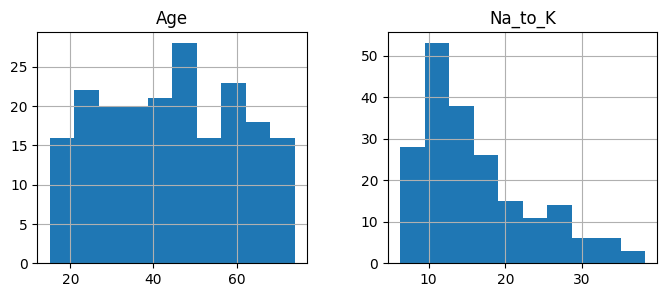

In [ ]:
df.hist(figsize=(8,3))
plt.show()

In [ ]:
df.value_counts("Drug")

Drug
drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
dtype: int64

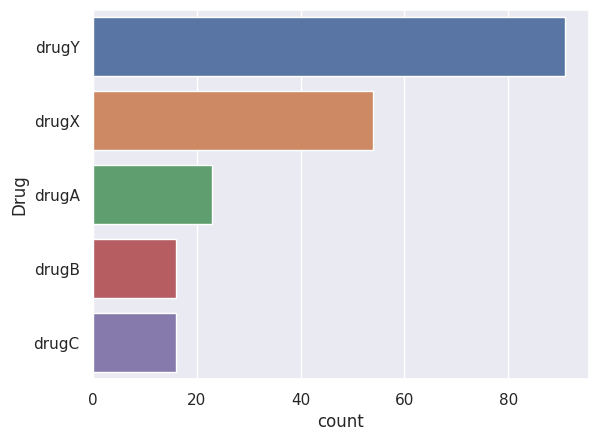

In [ ]:
sns.countplot(y="Drug", data=df, order=df.value_counts("Drug").index)
plt.show()

In [ ]:
df.value_counts("Sex")

Sex
M    104
F     96
dtype: int64

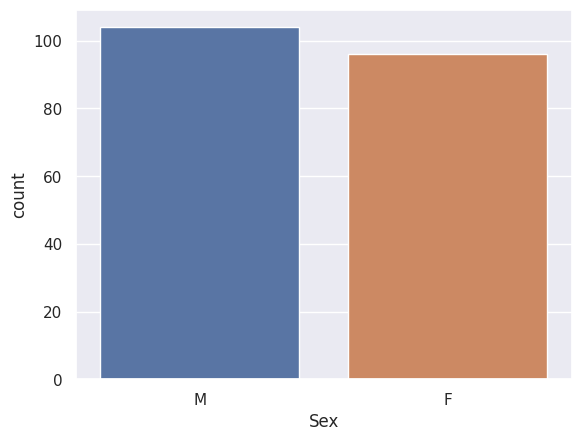

In [ ]:
sns.countplot(x="Sex", data=df, order=df.value_counts("Sex").index)
plt.show()

In [ ]:
df.value_counts("BP")

BP
HIGH      77
LOW       64
NORMAL    59
dtype: int64

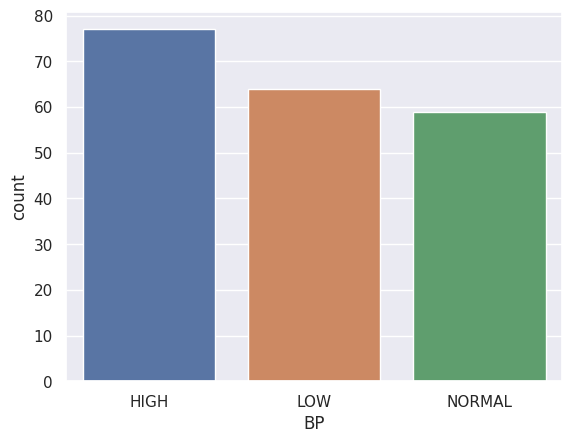

In [ ]:
sns.countplot(x="BP", data=df, order=df.value_counts("BP").index)
plt.show()

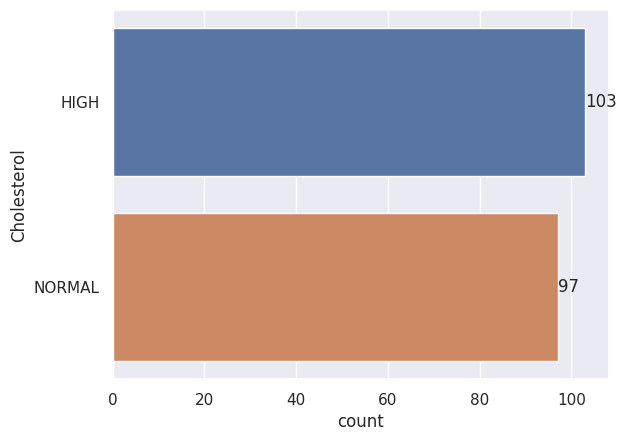

In [ ]:
ax = sns.countplot(y="Cholesterol", data=df, order=df.value_counts("Cholesterol").index)
for label in ax.containers:
    ax.bar_label(label)
plt.show()
plt.show()

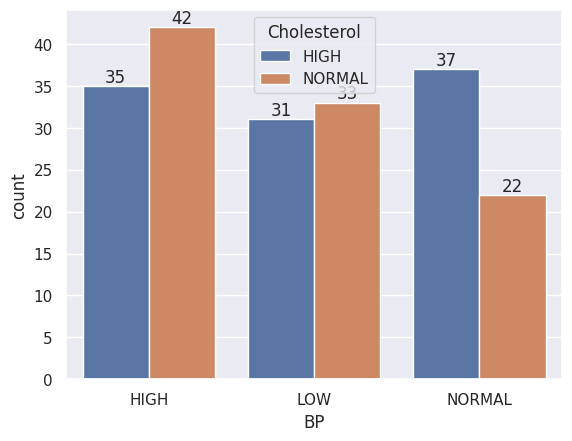

In [ ]:
ax = sns.countplot(data=df, x='BP', hue='Cholesterol')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

(array([0, 1, 2]),
 [Text(0, 0, 'HIGH'), Text(1, 0, 'LOW'), Text(2, 0, 'NORMAL')])

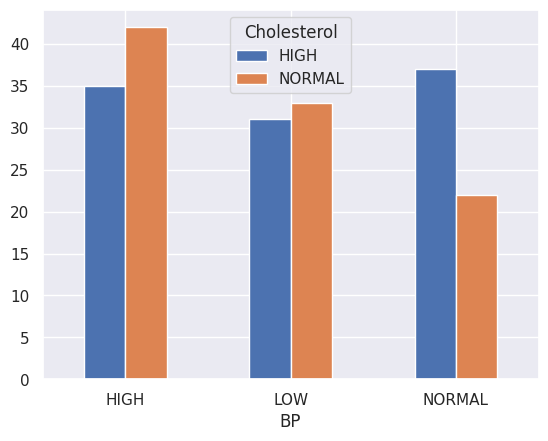

In [ ]:
pd.crosstab(df.BP, df.Cholesterol).plot(kind="bar")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'drugA'),
  Text(1, 0, 'drugB'),
  Text(2, 0, 'drugC'),
  Text(3, 0, 'drugX'),
  Text(4, 0, 'drugY')])

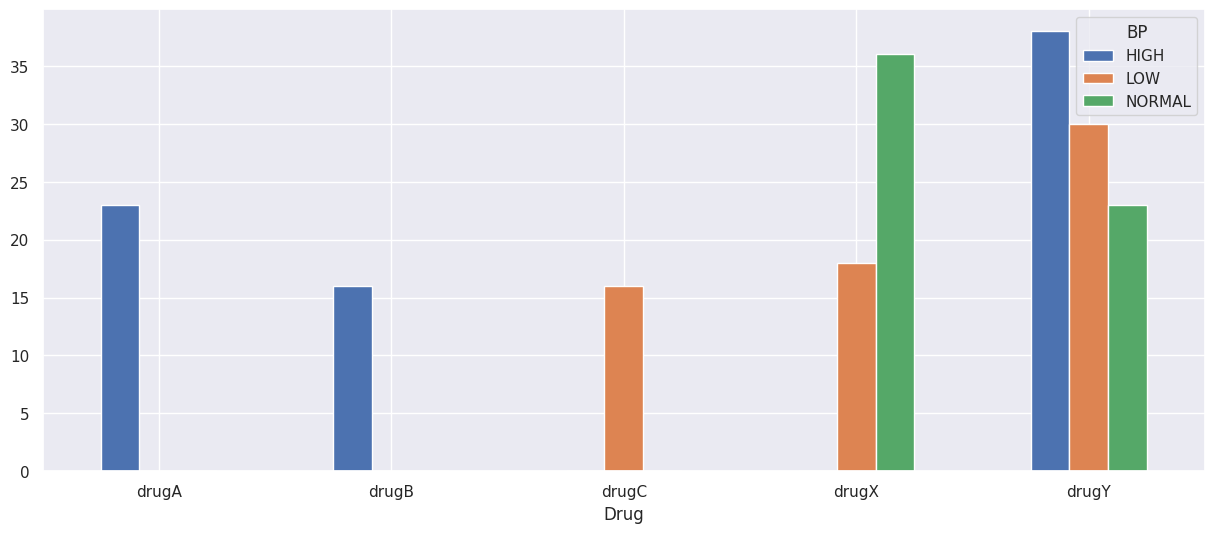

In [ ]:
pd.crosstab(df.Drug, df.BP).plot(kind="bar", figsize=(15,6))
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'drugA'),
  Text(1, 0, 'drugB'),
  Text(2, 0, 'drugC'),
  Text(3, 0, 'drugX'),
  Text(4, 0, 'drugY')])

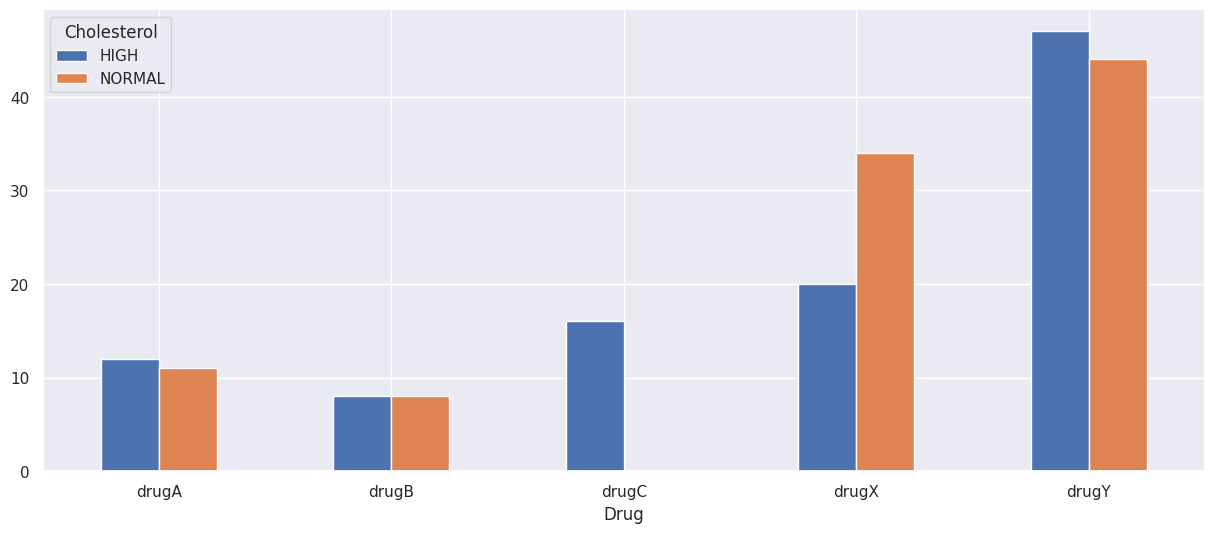

In [ ]:
pd.crosstab(df.Drug, df.Cholesterol).plot(kind="bar", figsize=(15,6))
plt.xticks(rotation=0)

<Axes: xlabel='Age', ylabel='Count'>

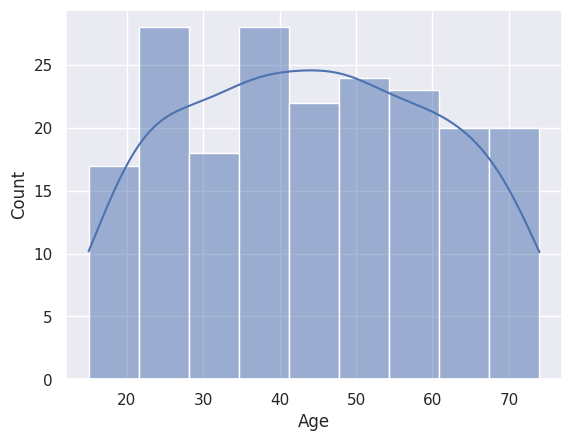

In [ ]:
sns.histplot(x="Age", data=df, kde=True)

<Axes: xlabel='Age'>

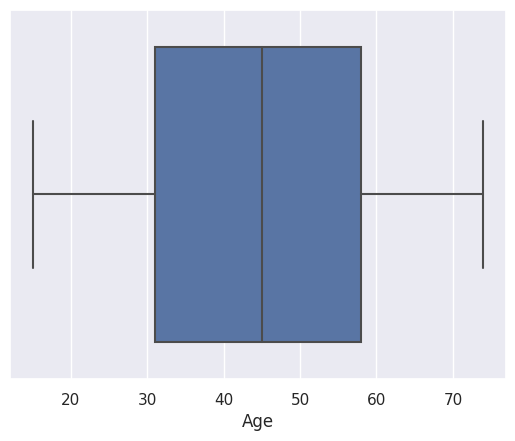

In [ ]:
sns.boxplot(x="Age", data=df)

<Axes: xlabel='Na_to_K', ylabel='Count'>

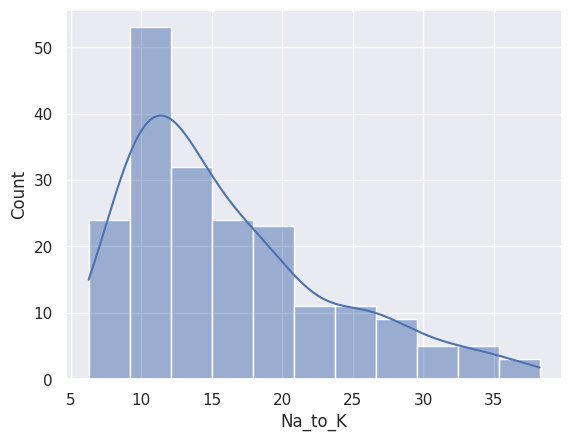

In [ ]:
sns.histplot(x="Na_to_K", data=df, kde=True)

<Axes: xlabel='Na_to_K'>

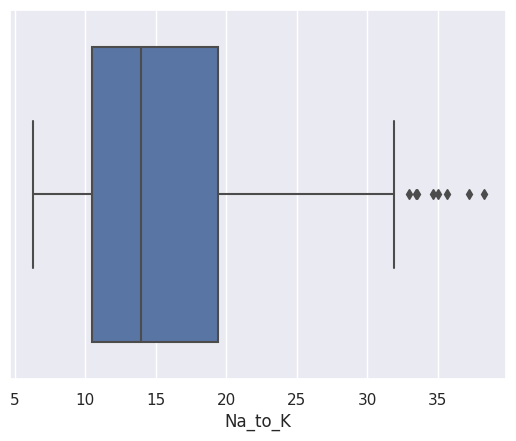

In [ ]:
sns.boxplot(x="Na_to_K", data=df)

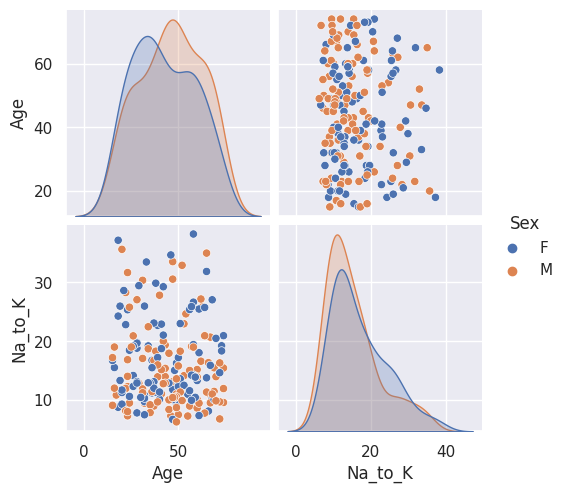

In [ ]:
sns.pairplot(data=df, hue='Sex')

<Axes: xlabel='Drug', ylabel='Na_to_K'>

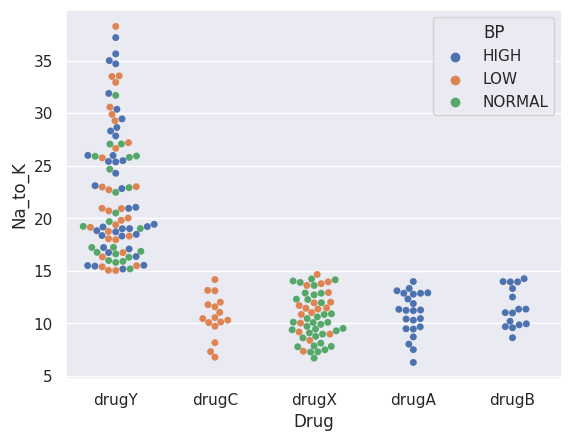

In [ ]:
sns.swarmplot(data=df, y='Na_to_K', x="Drug", hue="BP")

<Axes: xlabel='Drug', ylabel='Na_to_K'>

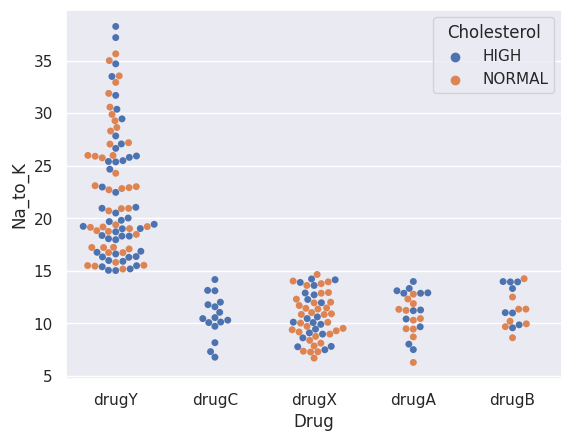

In [ ]:
sns.swarmplot(data=df, y='Na_to_K', x="Drug", hue="Cholesterol")

In [ ]:
sns.swarmplot(data=df, y='Age', x="Drug")

In [ ]:
print("Max age of Drug A:", df.Age[df.Drug == "drugA"].max())
print("Min age of Drug B:", df.Age[df.Drug == "drugB"].min())

Max age of Drug A: 50
Min age of Drug B: 51


In [ ]:
f_drug_count = df[df["Sex"] == "F"]["Drug"].value_counts()
m_drug_count = df[df["Sex"] == "M"]["Drug"].value_counts()

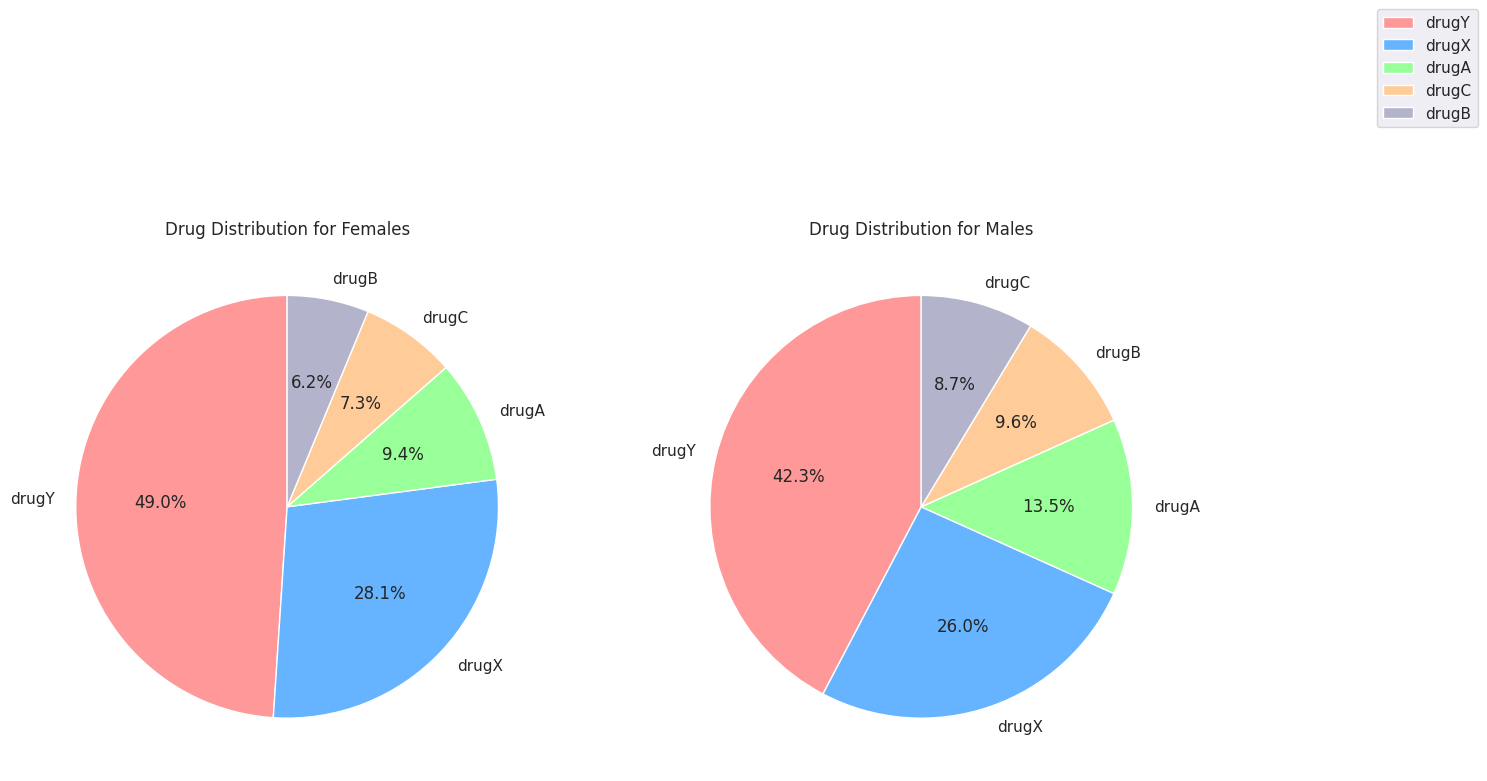

In [ ]:

# Filter the DataFrame by sex category and get the value counts for each drug
f_drug_count = df[df["Sex"] == "F"]["Drug"].value_counts()
m_drug_count = df[df["Sex"] == "M"]["Drug"].value_counts()

# Set the colors for the pie charts
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#b3b3cc','#c2c2f0']

# Create a grid of plots with one row and two columns, with a larger figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Plot the first pie chart on the first subplot
wedges1, _, _ = ax1.pie(f_drug_count.values, labels=f_drug_count.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Drug Distribution for Females')

# Plot the second pie chart on the second subplot
wedges2, _, _ = ax2.pie(m_drug_count.values, labels=m_drug_count.index, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Drug Distribution for Males')

# Create a shared legend for both subplots
fig.legend(wedges1, f_drug_count.index, loc="upper right", bbox_to_anchor=(1.1, 1))

# Show the plots
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'drugA'),
  Text(1, 0, 'drugB'),
  Text(2, 0, 'drugC'),
  Text(3, 0, 'drugX'),
  Text(4, 0, 'drugY')])

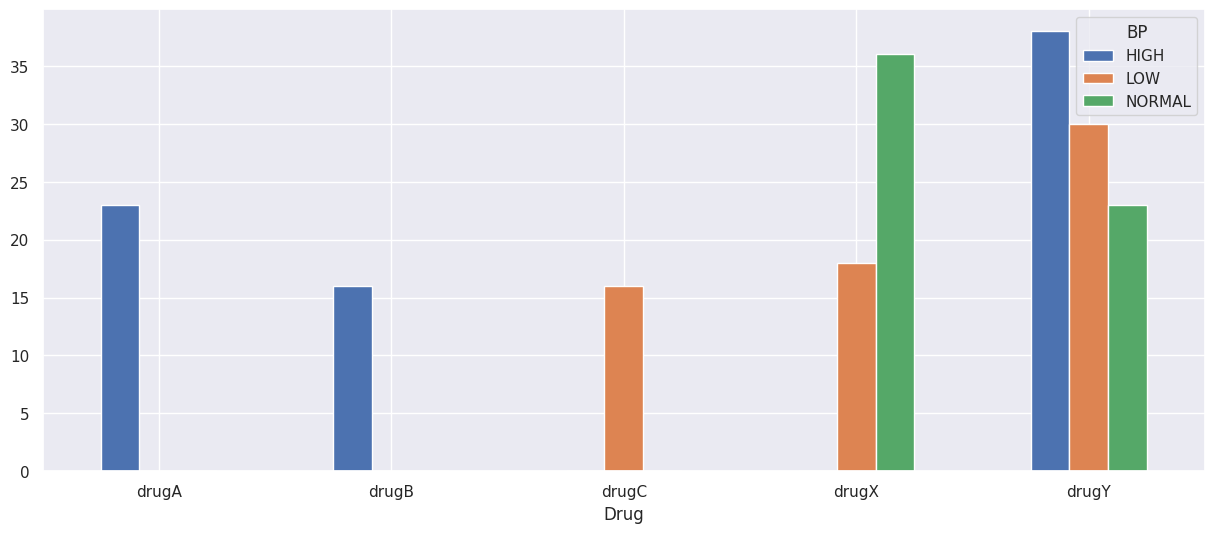